# Day 07 Pre-Class Assignment:<br> Solving Eigensystems with the Power Method

### <p style="text-align: right;"> &#9989; Cesarine Graham.</p>


## Goals of this assignment

The goals of this assignment are:

* Review the linear algebra of eigenvalues and eigenvector
* Learn about the power method
* Work on an example to learn about how to apply the power method on your own



## Assignment instructions

Upload the assignment to Gradescope before noon the day of the next class.

---

## Part 0: Solving Eigenvectors and Eigenvalues
Linear algebra pops up almost everywhere in physics.
Another common set of problems that arises in physics is the calculation of the eigenvalues and/or eigenvectors of a matrix.
This problem arises in classical mechanics, quantum mechanics, electromagnetism, and other areas.
Most eigenvalue problems in physics concern real symmetric matrices (or Hermitian matrices when complex numbers are involved, such as in quantum mechanics).
For a symmetric matrix $\mathbf{A}$, an _eigenvector_ $\mathbf{v}$ is a vector satisfying

$$\mathbf{A} \mathbf{v} = \lambda \mathbf{v}$$

where $\lambda$ is the corresponding _eigenvalue_.
For an $N \times  N$ matrix, there are $N$ eigenvectors $\mathbf{v}_1, \ldots, \mathbf{v}_N$ with eigenvalues $\lambda_1, \ldots, \lambda_N$.
Eigenvectors are orthogonal to one another:
$$\mathbf{v}_i \cdot \mathbf{v}_j=0 \qquad \text{if}\, i \neq j,$$
and we will assume they are normalized to have unit length
$$\mathbf{v}_i \cdot \mathbf{v}_i = 1 .$$

There are many methods to solve the eigenvectors and eigenvalues (collectively called the _eigensystem_).
In this class, we will study two commonly taught algorithms:
* Power method (Day 07)
* QR algorithm (Day 08)

Watch this video to review eigenvalues and eigenvectors in the linear algebra:

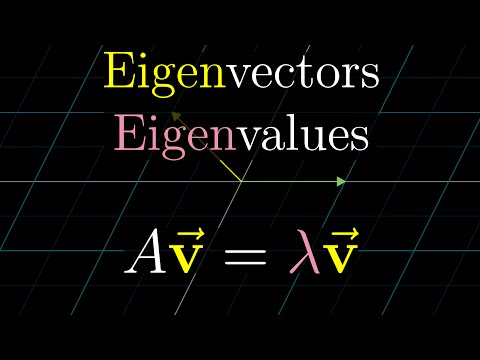

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("PFDu9oVAE-g",width=640,height=340)
# Direct link on YourTube: https://www.youtube.com/watch?v=PFDu9oVAE-g

---
## Part 1: Power Method
The _power method_ is used to find a dominant eigenvalue (one with the largest absolute value), if one exists, and a corresponding eigenvector.
To apply the power method to a square matrix $\mathbf{A}$, begin with an initial guess for the eigenvector of the dominant eigenvalue.
Multiply the most recently obtained vector on the left by $\mathbf{A}$, normalize the result, and repeat the process until the answer converges to the desired eigenvector (or until it is clear the results are not converging).
If convergence occurs, the norm of the final vector prior to normalization is the absolute value of the dominant eigenvalue.

Note that, although the power method is simple and useful, it is not always guaranteed to converge if the given matrix is nondiagonalizable.

### Task 1.1: Learn about the power method via a simple example

Watch this video to learn about the power method with detailed steps.
Feel free to work on the problem along with the video. You can always pause the video and go back if needed.
Note that the $n$ in the video converges to an eigenvalue $\lambda$, and $\mathbf{x}$ converges to the eigenvector $\mathbf{v}$.

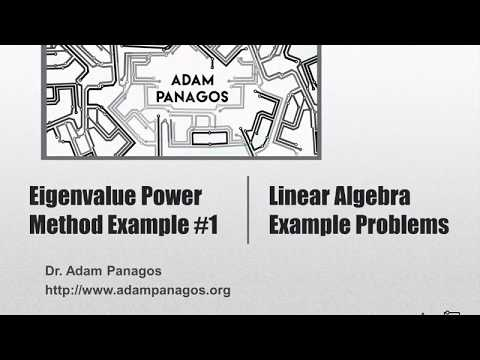

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("yBiQh1vsCLU",width=640,height=340)
# https://www.youtube.com/watch?v=yBiQh1vsCLU


### Task 1.2: Do this on your own
Following the steps in the video above, let's try to find the eigenvalues and eigenvectors for

$$\mathbf{A} =
  \begin{bmatrix}
    7  &  9    \\
    9  &  7   \\
  \end{bmatrix},$$

but now start with a different
$$
\mathbf{x}_0  =
  \begin{bmatrix}
     1    \\
    -2    \\
   \end{bmatrix}.
$$

In the Markdown cell below, write down your answers for $n_{0,1,2,3}$ and $\mathbf{x}_{1,2,3}$.

<font color='blue'>
$n_{0,1,2,3}$:
    
- $n_0 = \sqrt{50}$
- $n_1 = \sqrt{3200}$
- $n_2 = \sqrt{256000}$
- $n_3 = \sqrt{16384000}$

$\mathbf{x}_{1,2,3}$:

- $\mathbf{x}_1 = \frac{1}{\sqrt{50}}\begin{bmatrix}-5 \\ -5\end{bmatrix}$
- $\mathbf{x}_2 = \frac{1}{\sqrt{3200}}\begin{bmatrix}-40 \\ -40\end{bmatrix}$
- $\mathbf{x}_3 = \frac{1}{\sqrt{256000}}\begin{bmatrix}-320 \\ -320\end{bmatrix}$
    
where the math can be seen below:

**Iteration 0:**
$$
\begin{align*}
\mathbf{y}_0 &= \mathbf{Ax}_0 \\
&= \begin{bmatrix}
7 & 9 \\
9 & 7 \\
\end{bmatrix}
\begin{bmatrix}
1 \\
-2 \\
\end{bmatrix}
= \begin{bmatrix}
-5 \\
-5 \\
\end{bmatrix} \\
n_0 &= \|\mathbf{y}_0\| = \sqrt{(-5)^2 + (-5)^2} = \sqrt{50} \\
\mathbf{x}_1 &= \frac{\mathbf{y}_0}{n_0} = \frac{1}{\sqrt{50}}\begin{bmatrix}
-5 \\
-5 \\
\end{bmatrix}
\end{align*}
$$

**Iteration 1:**
$$
\begin{align*}
\mathbf{y}_1 &= \mathbf{Ax}_1 \\
&= \begin{bmatrix}
7 & 9 \\
9 & 7 \\
\end{bmatrix}
\left(\frac{1}{\sqrt{50}}\begin{bmatrix}
-5 \\
-5 \\
\end{bmatrix}\right)
= \frac{1}{\sqrt{50}}\begin{bmatrix}
-40 \\
-40 \\
\end{bmatrix} \\
n_1 &= \|\mathbf{y}_1\| = \sqrt{(-40)^2 + (-40)^2} = \sqrt{3200} \\
\mathbf{x}_2 &= \frac{\mathbf{y}_1}{n_1} = \frac{1}{\sqrt{3200}}\begin{bmatrix}
-40 \\
-40 \\
\end{bmatrix}
\end{align*}
$$

**Iteration 2:**
$$
\begin{align*}
\mathbf{y}_2 &= \mathbf{Ax}_2 \\
&= \begin{bmatrix}
7 & 9 \\
9 & 7 \\
\end{bmatrix}
\left(\frac{1}{\sqrt{3200}}\begin{bmatrix}
-40 \\
-40 \\
\end{bmatrix}\right)
= \frac{1}{\sqrt{3200}}\begin{bmatrix}
-320 \\
-320 \\
\end{bmatrix} \\
n_2 &= \|\mathbf{y}_2\| = \sqrt{(-320)^2 + (-320)^2} = \sqrt{256000} \\
\mathbf{x}_3 &= \frac{\mathbf{y}_2}{n_2} = \frac{1}{\sqrt{256000}}\begin{bmatrix}
-320 \\
-320 \\
\end{bmatrix}
\end{align*}
$$

**Iteration 3:**
$$
\begin{align*}
\mathbf{y}_3 &= \mathbf{Ax}_3 \\
&= \begin{bmatrix}
7 & 9 \\
9 & 7 \\
\end{bmatrix}
\left(\frac{1}{\sqrt{256000}}\begin{bmatrix}
-320 \\
-320 \\
\end{bmatrix}\right)
= \frac{1}{\sqrt{256000}}\begin{bmatrix}
-2560 \\
-2560 \\
\end{bmatrix} \\
n_3 &= \|\mathbf{y}_3\| = \sqrt{(-2560)^2 + (-2560)^2} = \sqrt{16384000} \\
\mathbf{x}_4 &= \frac{\mathbf{y}_3}{n_3} = \frac{1}{\sqrt{16384000}}\begin{bmatrix}
-2560 \\
-2560 \\
\end{bmatrix}
\end{align*}
$$

---
## Part 2: Inverse Power Method and Rayleigh Quotient
We learned in Part 1 how to extract the eigenvalue and eigenvector of the dominant eigenvalue, but what about the others?
Also, it would be nice if there were some way to make the convergence go faster.

### Task 2.1: Watch this video to learn about the Jacobi method

_Hint: If this video goes a bit fast for you, use the time controls to slow down the playback speed._

This video will also take a look at another example of the power method.
If the method still feels alien to you, try to apply the power method again to the given example below with starting guess of the vector and check your answer.

If you are confident with the procedure, skip to 2:52 of the video to start with the _inverse power method_ to find the smallest eigenvalue of the matrix.  

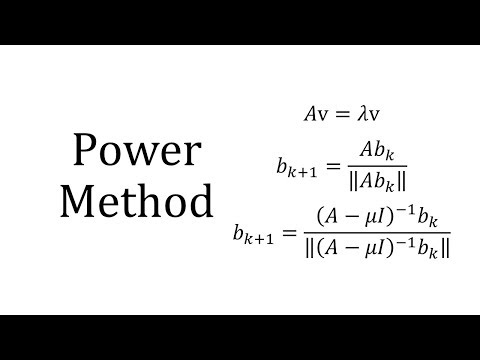

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("LHlg_lfihiA",width=640,height=340)
# https://www.youtube.com/watch?v=LHlg_lfihiA

### Task 2.2: Apply the inverse power method

Take the example from Part 1, and apply the inverse power method to the matrix

$$\mathbf{A} =
  \begin{bmatrix}
    7  &  9    \\
    9  &  7   \\
  \end{bmatrix}$$

with

$$
\mathbf{x}_0  =
  \begin{bmatrix}
     1    \\
    0    \\
   \end{bmatrix}
$$
  
to find the eigenvector of the smallest eigenvalue and the eigenvalue.

Apply the steps 3 times and write down your answers for $n_{0,1,2,3}$ and $\mathbf{x}_{1,2,3}$
in the Markdown cell below.

<font color='blue'>
$n_{0,1,2,3}$ and $\mathbf{x}_{1,2,3}$:

- $n_0 = n_1 = n_2 = n_3 = \sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2}$
- $\mathbf{x}_1 = \mathbf{x}_2 = \mathbf{x}_3 = \mathbf{x}_4 = \frac{1}{\sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2}}\begin{bmatrix} 7 \\ -9 \end{bmatrix}$
    
where the math can be seen below:
    
**Iteration 0:**
$$
\begin{align*}
\mathbf{y}_0 &= \mathbf{A}^{-1}\mathbf{x}_0 \\
&= \frac{1}{40}\begin{bmatrix} 7 \\ -9 \end{bmatrix} \\
n_0 &= \|\mathbf{y}_0\| = \sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2}
\end{align*}
$$

**Iteration 1:**
$$
\begin{align*}
\mathbf{y}_1 &= \mathbf{A}^{-1}\mathbf{x}_1 \\
&= \frac{1}{40}\begin{bmatrix} 7 \\ -9 \end{bmatrix} \\
n_1 &= \|\mathbf{y}_1\| = \sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2} \\
\mathbf{x}_2 &= \frac{\mathbf{y}_1}{n_1}
\end{align*}
$$

**Iteration 2:**
$$
\begin{align*}
\mathbf{y}_2 &= \mathbf{A}^{-1}\mathbf{x}_2 \\
&= \frac{1}{40}\begin{bmatrix} 7 \\ -9 \end{bmatrix} \\
n_2 &= \|\mathbf{y}_2\| = \sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2} \\
\mathbf{x}_3 &= \frac{\mathbf{y}_2}{n_2}
\end{align*}
$$

**Iteration 3:**
$$
\begin{align*}
\mathbf{y}_3 &= \mathbf{A}^{-1}\mathbf{x}_3 \\
&= \frac{1}{40}\begin{bmatrix} 7 \\ -9 \end{bmatrix} \\
n_3 &= \|\mathbf{y}_3\| = \sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2} \\
\mathbf{x}_4 &= \frac{\mathbf{y}_3}{n_3}
\end{align*}
$$

### Task 2.3: Rayleigh quotient
Now apply the _Rayleigh quotient_ to your steps in Task 2.2 in between steps.
Write down your new $n_{0,1,2,3}$ and $\mathbf{x}_{1,2,3}$.

<font color='blue'>

$n_{0,1,2,3}$ and $\mathbf{x}_{1,2,3}$:

- $n_0 = n_1 = n_2 = n_3 = \sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2}$
- $\mathbf{x}_1 = \mathbf{x}_2 = \mathbf{x}_3 = \mathbf{x}_4 = \frac{1}{\sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2}}\begin{bmatrix} 7 \\ -9 \end{bmatrix}$
    
where the math can be seen below:
    
**Iteration 0:**
$$
\begin{align*}
\lambda_0 &= \frac{\mathbf{x}_0^T \mathbf{A} \mathbf{x}_0}{\mathbf{x}_0^T \mathbf{x}_0} \\
&= \frac{\begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 7 & 9 \\ 9 & 7 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}}{\begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}} \\
&= \frac{7}{1} = 7 \\
\mathbf{y}_0 &= \mathbf{A}^{-1}\mathbf{x}_0 \\
&= \begin{bmatrix} 7 & 9 \\ 9 & 7 \end{bmatrix}^{-1}\begin{bmatrix} 1 \\ 0 \end{bmatrix} \\
&= \frac{1}{40}\begin{bmatrix} 7 \\ -9 \end{bmatrix} \\
n_0 &= \|\mathbf{y}_0\| = \sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2} \\
\mathbf{x}_1 &= \frac{\mathbf{y}_0}{n_0} \\
\end{align*}
$$

**Iteration 1:**
$$
\begin{align*}
\lambda_1 &= \frac{\mathbf{x}_1^T \mathbf{A} \mathbf{x}_1}{\mathbf{x}_1^T \mathbf{x}_1} \\
&= \frac{\frac{1}{\sqrt{50}}\begin{bmatrix}-5 & -5\end{bmatrix} \begin{bmatrix} 7 & 9 \\ 9 & 7 \end{bmatrix} \frac{1}{\sqrt{50}}\begin{bmatrix}-5 \\ -5\end{bmatrix}}{\frac{1}{\sqrt{50}}\begin{bmatrix}-5 & -5\end{bmatrix} \frac{1}{\sqrt{50}}\begin{bmatrix}-5 \\ -5\end{bmatrix}} \\
&= \frac{-50}{-50} = 1 \\
\mathbf{y}_1 &= \mathbf{A}^{-1}\mathbf{x}_1 \\
&= \frac{1}{40}\begin{bmatrix} 7 \\ -9 \end{bmatrix} \\
n_1 &= \|\mathbf{y}_1\| = \sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2} \\
\mathbf{x}_2 &= \frac{\mathbf{y}_1}{n_1} \\
\end{align*}
$$

**Iteration 2:**
$$
\begin{align*}
\lambda_2 &= \frac{\mathbf{x}_2^T \mathbf{A} \mathbf{x}_2}{\mathbf{x}_2^T \mathbf{x}_2} \\
&= \frac{\frac{1}{\sqrt{3200}}\begin{bmatrix}-40 & -40\end{bmatrix} \begin{bmatrix} 7 & 9 \\ 9 & 7 \end{bmatrix} \frac{1}{\sqrt{3200}}\begin{bmatrix}-40 \\ -40\end{bmatrix}}{\frac{1}{\sqrt{3200}}\begin{bmatrix}-40 & -40\end{bmatrix} \frac{1}{\sqrt{3200}}\begin{bmatrix}-40 \\ -40\end{bmatrix}} \\
&= \frac{-3200}{-3200} = 1 \\
\mathbf{y}_2 &= \mathbf{A}^{-1}\mathbf{x}_2 \\
&= \frac{1}{40}\begin{bmatrix} 7 \\ -9 \end{bmatrix} \\
n_2 &= \|\mathbf{y}_2\| = \sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2} \\
\mathbf{x}_3 &= \frac{\mathbf{y}_2}{n_2} \\
\end{align*}
$$

**Iteration 3:**
$$
\begin{align*}
\lambda_3 &= \frac{\mathbf{x}_3^T \mathbf{A} \mathbf{x}_3}{\mathbf{x}_3^T \mathbf{x}_3} \\
&= \frac{\frac{1}{\sqrt{256000}}\begin{bmatrix}-320 & -320\end{bmatrix} \begin{bmatrix} 7 & 9 \\ 9 & 7 \end{bmatrix} \frac{1}{\sqrt{256000}}\begin{bmatrix}-320 \\ -320\end{bmatrix}}{\frac{1}{\sqrt{256000}}\begin{bmatrix}-320 & -320\end{bmatrix} \frac{1}{\sqrt{256000}}\begin{bmatrix}-320 \\ -320\end{bmatrix}} \\
&= \frac{-256000}{-256000} = 1 \\
\mathbf{y}_3 &= \mathbf{A}^{-1}\mathbf{x}_3 \\
&= \frac{1}{40}\begin{bmatrix} 7 \\ -9 \end{bmatrix} \\
n_3 &= \|\mathbf{y}_3\| = \sqrt{\left(\frac{7}{40}\right)^2 + \left(\frac{-9}{40}\right)^2} \\
\mathbf{x}_4 &= \frac{\mathbf{y}_3}{n_3} \\
\end{align*}
$$

### Task 2.4: (Optional) Generalize to the $N \times N$ case
From the simple examples given in this pre-class assignment, think about how you may want to generalize to larger matrices, from $N=3$ to 10 or 100.

<font color='blue'>
Below is code which I had the foundation of prior to this class, so after adjusting it, I think this could work for our given problem. However, I'm not sure if we are allowed to use np.linalg.norm(y) and I don't know how to adjust the code to not use this built-in function.

In [3]:
import numpy as np

def power_method(A, num_iterations=1000, tol=1e-6):
    N = A.shape[0] # getting the size of the SQUARE matrix A
    x = np.random.rand(N) # initializing a random vector of size N
    
    for i in range(num_iterations): #iterating for a certain amount of times
        y = np.dot(A, x) # multiplying matrix A by vector x
        x = y / np.linalg.norm(y) # normalizing the result vector
        
        # checking for convergence
        if i > 0 and np.abs(np.dot(x, y) / np.dot(x, x) - np.dot(x_prev, y_prev) / np.dot(x_prev, x_prev)) < tol:
            break

        x_prev, y_prev = x, y
    
    eigenvalue = np.dot(x, np.dot(A, x)) # approximating the dominate eigenvalue
    eigenvector = x # approvimating the corresponding eigenvalue
    
    return eigenvalue, eigenvector

---
## Assignment Wrap-up

Please submit your notebook **in ipynb format** to Gradescope.

**You must complete the pre-class survey in order to receive credit for the assignment!**